In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Introduction


Having mathematical functions and computations on a computer always involve approximations.  A function
$f(x)$ contains an infinite amount of information, while the computer can only store a finite amount of data.  Think about
the $sin(x)$ function.  We normally approximate our understanding of the $sin(x)$ function
by running an algorithm that can compute an approximation for a value $x$ of the $sin(x)$.  Using Python's `NumPy`
library and vectorizied operations, we of course usually do this for many values of $x$ at a time, but still for some
finite number of representative values that we need.  One way that the $sin(x)$ algorithm could potentially be implemented
on a digital computer is to store the values for the function in a table.  Of course, once again we can only store a
discrete set of representative values with their $sin(x)$ calculations.  And also, another problem becomes that if we
want to determine the value of the $sin(x)$ for a value of $x$ that is not in the table, we will have to interpolate
our table data somehow to approximate the answer that is required.  This idea of approximating a function with a 
finite set of $x, f(x)$ pairs of information is known as a *discrete* representation of a function.

Physical quantities, such as temperature, density, and velocity, are usually defined as continuous functions of space and time.
However, discrete versions of the functions are necessary on digital computers.  

We have seen how to generate a plot of the $sin(x)$ function on a computer using `NumPy` and
the `Matplotlib` library.  For example, if we want to plot the values of the $sin(x)$ function for values of
$x$ between $0$ and $2\pi$, we create a finite set of points in the range.  Precisely, to create a 
representation of the function, we define a set of $n + 1$ points by:

\begin{equation}
x_i = i \cdot h  \quad \text{for} \quad i = 0, 1, ..., n
\end{equation}

where $h = 2 \pi / n$ (known as the mesh step size, or simply the step) and $n \ge 1$ is an integer.
The associated function values (computed using the vectorized
`np.sin()` ) function are:

\begin{equation}
s_i = sin(x_i) \quad \text{for} \quad i = 0, 1, ..., n
\end{equation}

These can also be represented mathematically as a series.  We have a series of coordinates $(x_i)_{i=0}^n$ and a series
of the function values $(s_i)_{i=0}^n$.  Often we merge the two sequences to one sequence of points: $(x_i, s_i)_{i=0}^n$.
Sometimes we also use a shorter notation, just $x_i, s_i$ if the exact limits and number of points we digitized the range
over are not important.  The set of coordinates constitutes a discrete *mesh* (or if we are working with more dimensions
a *grid*).  The individual coordinates $x_i$ are known as *nodes* in the mesh.  The discrete representation of the
$sin(x)$ function on the interval from $[0, 2 \pi]$ consists of the mesh and the corresponding sequence of function values $s_i$ at the nodes.
The parameter $n$ (the number of points we discretized out interval into) is often referred to as the *mesh resolution*.

In previous lectures, you saw how we represent the mesh by a coordinate array (a NumPy array), say $x$, and the function
values by another array (computed using a vectorized Python function), say $s$.  And to plot the $sin(x)$ function, we
can simply do:

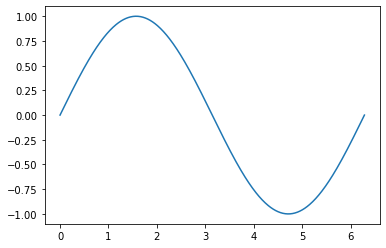

In [2]:
n = 500
x = np.linspace(0, 2.0*np.pi, n+1)
s = np.sin(x)
plt.plot(x, s);

In [3]:
x[0:2]

array([0.        , 0.01256637])

In [4]:
s[0:2]

array([0.        , 0.01256604])

If the mesh is not sufficiently of a high enough resolution to properly visualize the function, we can increase the
mesh resolution until our approximation becomes detailed enought so that it is useful:

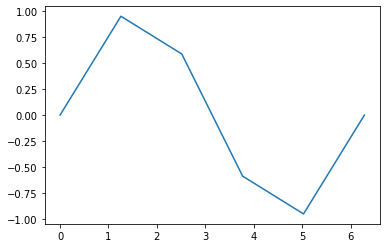

In [5]:
n = 5
x = np.linspace(0, 2.0*np. pi, n+1)
s = np.sin(x)
plt.plot(x, s);

# Interpolation


The points plotted by `matplotlib` are an approximation of the true function curve.  Successive points
on our mesh are approximated by drawing straight line approximations between successive $s_i$ values.  In effect, the
points between $s_i$ and $s_{i + 1}$ are approximated by being interpolated.  We don't know the exact value of our function
between these points on our mesh, so we represent them by approximating the value assuming a linear change between them will be
close enough to the true value for our purposes.

Finding function values between nodes in a mesh of a discrete function representation is known as *interpolation*.  We can also
talk about interpolating a discrete function.  We can formally define the interpolation in the following manner.  Assume
that we know that a given $x\text{*}$ lies in the interval between $x_k$ to $x_{k+1}$, where the integer $k$ is given.
In the interval $x_k \le x\text{*} < x_{k+1}$, we define the linear function that passes through $(x_k, s_k)$ and $(x_{k+1}, s_{k+1})$
as:

\begin{equation}
S_k(x) = s_k + \frac{s_{k+1} - s_k}{x_{k+1} - x_k} (x - x_k)
\end{equation}

That is, for our $sin(x)$ function example, $S_k(x)$ coincides with the value of $sin(x)$ at $x_k$ and $x_{k+1}$.  Between
these nodes, $S_k(x)$ is linear.  We say that $S_k(x)$ interpolates the discrete function $(x_i, s_i)_{i=0}^n$ on
the inteval $[x_k, x_{k+1}]$

# Evaluating the Error on the Interpolation

Given the values $(x_i, s_i)_{i=0}^n$ and our formula for $S_k(x)$ to linearly interpolate between points on our discrete function,
lets examine the error that such interpolation gives us in our approximation.  Intuitively, you should think that 
the more points we have in our mesh, the smaller our errors will be when interpolating.  For example, lets say we want to 
find the error when approximating $sin(\sqrt{2})$.  Lets examine the error in interpolation as we change our mesh size $n$.  To do this,
we need to be able to determine the nodes on our mesh $k$ and $k+1$ between which the $\sqrt{2}$ lies.  $k$ will be different
for any given mesh size $n$, but it is easy to calculate:

$x = \sqrt{2}$

$k = \lfloor \frac{x}{h} \rfloor$

where the function $\lfloor z \rfloor$ deonotes the `floor` function, the largest integer that is smaller
than $z$, and $h$ was our step size for the mesh.  Here is a function that calculates the approximation error for our
straight line interpolation against the exact value of the $sin(\sqrt{2})$ (Note: The value is not really exact,
of course, because we use the `np.sin()` function from `NumPy` to calculate it, which is itself an approximation.  But it is more
exact than our interpolation on the discrete function).

In [6]:
def S_k(xp, x, s):
    """Where xp is the point we are interpolating, and x and s are the precalculated discrete
    function representation of the sin(x) function
    """
    # we first infer the mesh size, and the step size, from the x,s discrete function table arrays
    n = x.shape[0] - 1
    h = (x[-1] - x[0]) / float(n) # h = (b - a) / n 
    
    # now determine the interval k,k+1 that xp lies within for our mesh
    k = int(np.floor(xp / h))
    
    return s[k] + ( (s[k+1] - s[k]) / (x[k+1] - x[k]) ) * (xp - x[k])

In [7]:
xp = np.sqrt(2.0)
exact = np.sin(xp)

# here we are exploring the approximation error in the interpolation for mesh sizes of n
# ranging from 5 to 50.  For each mesh size we determine the interpolation approximation and compare
# that with the "exact" solution return by the NumPy sin() function
for n in range(5, 51, 5):
    x = np.linspace(0, 2.0*np.pi, n+1)
    s = np.sin(x)
    apprx = S_k(xp, x, s)
    print( "mesh size (n) = %d" % n ) 
    print( "   Approximation: %f" % apprx ) 
    print( "   Exact        : %f" % exact ) 
    print( "   Approximation error: %f" % (exact - apprx)  ) 

mesh size (n) = 5
   Approximation: 0.905504
   Exact        : 0.987766
   Approximation error: 0.082262
mesh size (n) = 10
   Approximation: 0.951057
   Exact        : 0.987766
   Approximation error: 0.036709
mesh size (n) = 15
   Approximation: 0.967408
   Exact        : 0.987766
   Approximation error: 0.020358
mesh size (n) = 20
   Approximation: 0.975606
   Exact        : 0.987766
   Approximation error: 0.012160
mesh size (n) = 25
   Approximation: 0.980506
   Exact        : 0.987766
   Approximation error: 0.007260
mesh size (n) = 30
   Approximation: 0.983759
   Exact        : 0.987766
   Approximation error: 0.004007
mesh size (n) = 35
   Approximation: 0.986074
   Exact        : 0.987766
   Approximation error: 0.001692
mesh size (n) = 40
   Approximation: 0.987727
   Exact        : 0.987766
   Approximation error: 0.000039
mesh size (n) = 45
   Approximation: 0.986683
   Exact        : 0.987766
   Approximation error: 0.001083
mesh size (n) = 50
   Approximation: 0.986284
 

The approximation error does go down, in general, but there is some fluctuation.  Question: can you come up with an explanation
for why the approximation for, for example, $n=40$ can at times be better than those for larger mesh sizes?

# Discrete Functions: The General Concept

In general, given the previous discussion, we can define and create a discrete approximation of a continuous function as 
follows.  Suppose a continuous function $f(x)$ is defined on an interval ranging from $x = a$ to $x = b$, and let
$n \ge 1$ be a given integer.  We define the distance between nodes on our discrete function mesh as:

\begin{equation}
h = \frac{b - a}{n}
\end{equation}

You should note that in this definition of the discrete function mesh, the distances between nodes are defined to always be
equidistant apart.  The distance is denoted by the step size $h$.  The location of the nodes on the mesh are given by:

\begin{equation}
x_i = a + ih \quad \text{for} \quad i = 0, 1, ..., n
\end{equation}

The discrete function values are given by

\begin{equation}
y_i = f(x_i) \quad \text{for} \quad i = 0, 1, ..., n
\end{equation}

Notice that there are $n+1$ points in our series (since we start indexing at 0).  These values define the series 
$(x_i, y_i)_{i=0}^n$ which is the discrete approximation of the continuous function $f(x)$.  

This was all a long winded and very formal way of defining a concept that you should now be quite familiar with, and that
we introduced in this course all the way back in the second or third week.  For example, when we visualize functions
for plotting, or vectorize functions to create discrete representations over ranges of the function for analysis, we
are basically working with this exact same concept of a discrete function.  In all these cases, we create a mesh
of equi-distantly spaced points over the range of interest (the $x_i$) and we calculate a corresponding mesh of nodes
of the function of interest (the $y_i$).

Why bother with this formal way of defining and transforming a continuous function into a discrete function?  Well
discrete function approximations are necessary approximations if we want to perform calculations on a digital
computer.  We cannot represent actual continuously infinite values on a range, and compute an infinite number of
values for the continuous function.  And discrete function representations have easy, directly translatable
(and computable) correspondences to very useful operations on continuous functions.

**Differentiation Becomes Finite Differences**

The following discussions are a bit of a preview of some of the material coming up in the course.  You have no doubt
heard about derivatives.  The fundamental definition of the derivative from the calculus is:

\begin{equation}
f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{equation}

That is to say, we calculate the derivative of the function $f(x)$ at some point $x$ by taking the finite difference.  We
compute the value of the function at point $x$ and a small step away at point $x + h$ and take the difference between
these two points (divided by the step size $h$).  This difference tells us approximately how fast the function is changing
at the point $x$ (and whether it is increasing or decreasing, by the sign of the difference).  The true derivative of
the function at the point will be arrived at as we decrease the step size $h$.  As $h$ approaches 0 (gets smaller and
smaller), we will converge on the true derivative.

Of course on a digital computer we can't compute the true derivative, because to compute the limit we have to compute infinitely
many smaller values of the step size $h$.  However, we will obtain a quite good approximation of the derivative by using a
fixed positive value of $h$.  More precisely, for a small $h > 0$ we can approximate the derivative as:

\begin{equation}
f'(x) \approx \frac{f(x + h) - f(x)}{h}
\end{equation}

The fraction on the right is a finite difference approximation of the derivative of the function $f$ at the point $x$.

For example, we could find the derivative of a function 

\begin{equation}
f(x) = 3 x^3 - 2 x^2 + 3 x - 4
\end{equation}

like this (and compare it to the method for calculating the derivative found in the scipy library):



In [8]:
def f(x):
    return (3.0 * x**3) - (2.0 * x**2) + (3.0 * x) - 4.0

# using a small h, approximate derivative using finite difference
h = 1e-8
x = 3.0
dx = (f(x + h) - f(x)) / h
print( "Approximation of derivative at point %f using finite differences is: %0.16f" % (x, dx) ) 

# using SciPy to calculate for us (SciPy probably just uses the same method the finite difference)
from scipy.misc import derivative
dx = derivative(f, x, h)
print( "Approximation of the derivative using SciPy derivative method at point %f is: %0.16f" % (x, dx) ) 

# analytically the derivative is found using differentiation, 
dx = (9 * x**2) - (4 * x) + 3
print( "Analytically using differentiation, derivative at point %f is: %0.16f" % (x, dx) ) 

Approximation of derivative at point 3.000000 using finite differences is: 72.0000002729648259
Approximation of the derivative using SciPy derivative method at point 3.000000 is: 71.9999995624220901
Analytically using differentiation, derivative at point 3.000000 is: 72.0000000000000000


**Integration Becomes Summation**

Some functions can be integrated analytically, when a procedure for determining the antiderivative of the function
is known.  But lots of functions cannot be integrated in this way.  However, we often want to find the integral
of a function over some definite range of values.  It turns out that we can (relatively simply) compute an approximation
of the integral of a function over a definite range, using the discrete function representation of the function we
have developed.  And we can do this successfully whether the original function is easily integrated using an analytic
method, or even when the function cannot be integrated analytically.

An example should make this clearer.  One interpretation of the integration of a function over a range, is that we are
calculating the area under the curve made by the function, between the curve and $y = 0$.  So we can compute an approximation
of the definite integral over an inteval:

\begin{equation}
\int_a^b f(x) \; dx
\end{equation}

by using a discrete version of the continuous function $(x_i, y_i)_{i=0}^n$.  For example, each $k, k+1$ subinterval of
the mesh of our discrete function will define a polygon, if we interpolate a straight line between the $y_k, y_{k+1}$ point
of the function.  We can easily calculate the area of each of these individual polygons defined by the discrete function.
The sum of these areas is an approximation of the integral of the function over the range of values.  We can increase
the accuracy of the approximation simply by using smaller $h$ step sizes, so that the error from interpolation is not
to great.  In the limit, again, as $h \rightarrow 0$, the approximation using this sum of polygons will approach the
true value of the integral.  We will explore this idea in greater detail in a later lecture.

# Taylor Series

The single most important mathematical tool in computational science may be the Taylor series.  It is used to 
derive new computational methods,  and also for the analysis of the accuracy of approximations.  We show examples of
both of these when we develop methods for numerical integration on a computer (Lectures 06 and 07), analyze the
accuracy of integration methods, and when we develop methods for solving simple ordinary differential equations (Lectures 08 and 09).

# Approximating Functions Close to One Point

Suppose you know the value of a function $f$ at some point $x_0$, and you are interested in the value of $f$ close to $x_0$.
More precisely, suppose we know $f(x_0)$ and we want an approximation of $f(x_0 + h)$ where $h$ is a small number.  If the function
is smooth and $h$ is really small, our first approximation is:

**Eq 1**
\begin{equation}
f(x_0 + h) \approx f(x_0)
\end{equation}

That approximation is, of course, not very accurate.  In order to derive a more accurate approximation, we have to know more about
$f$ at and around the point $x_0$.  Suppose that we know the value of $f(x_0)$ and we know the rate of change of the function
at that point, $f'(x_0)$, then we can find a better approximation of $f(x_0 + h)$ by recalling from the fudamental definition
of the derivative that

\begin{equation}
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
\end{equation}

and hence we can rearrange and have:

**Eq 2**

\begin{equation}
f(x_0 + h) \approx f(x_0) + hf'(x_0)
\end{equation}

Here we have basically used our definition of the derivative/finite difference and turned it around to estimate the value of the function
a small distance away from a known point.  What Eq 2 says is that, if we know the rate of change of the function and the
value of the function at point $x_0$, an estimate of the function a small distance away $h$ can be found by multiplying
$h f'(x_0)$ and adding it to $f(x_0)$.  This makes sense, as multiplying the rate of change times the distance away we
want to approximate, should give us an idea of how much the value of the function will change over that short step $h$.

It might not seem useful to have Eq 2, but we will see how it can be used. 

# Approximating the Exponential Function

Lets give an example which might help us to understand what we can do with the previous approximation.  Consider the case of
the exponential function:

\begin{equation}
f(x) = e^x
\end{equation}

around the point $x_0 = 0$. (Where $e$ is [Euler's Number](http://en.wikipedia.org/wiki/E_%28mathematical_constant%29) $\approx 2.71828$
and the exponential function simply raises $e$ to some power $x$.)
The derivative of the $e^x$ is special, and is known to be simply 

\begin{equation}
f'(x) = e^x
\end{equation}

e.g. the rate of change of the exponential function is the same as the value of the function.  Since $f(x) = f'(x) = e^x$, and we have 
$f(0) = f'(0) = 1$, it then follows from **Eq 2** that

\begin{equation}
f(0 + h) \approx f(0) + hf'(0) 
\end{equation}

thus: 

\begin{equation}
e^h \approx 1 + h
\end{equation}

The little program below prints $e^h$ (computed using Pythons `exp()` function) and the approximation we just derived $1 + h$
for a range of h values:

In [9]:
print(np.e)
x = 0.0
print(np.e**x)
print(np.exp(x))

2.718281828459045
1.0
1.0


In [10]:
h = 1.0
while h > 1e-6:
    actual_value = np.exp(h)
    our_estimate = 1.0 + h
    error = np.abs(actual_value - our_estimate)
    print( "h=%8.6f  exp(h)=%11.8e  1+h=%11.8e error=%11.8e" % (h, actual_value, our_estimate, error ) ) 
    h *= 0.1

h=1.000000  exp(h)=2.71828183e+00  1+h=2.00000000e+00 error=7.18281828e-01
h=0.100000  exp(h)=1.10517092e+00  1+h=1.10000000e+00 error=5.17091808e-03
h=0.010000  exp(h)=1.01005017e+00  1+h=1.01000000e+00 error=5.01670842e-05
h=0.001000  exp(h)=1.00100050e+00  1+h=1.00100000e+00 error=5.00166708e-07
h=0.000100  exp(h)=1.00010001e+00  1+h=1.00010000e+00 error=5.00016673e-09
h=0.000010  exp(h)=1.00001000e+00  1+h=1.00001000e+00 error=5.00000041e-11
h=0.000001  exp(h)=1.00000100e+00  1+h=1.00000100e+00 error=5.00044450e-13


As expected, $1+h$ is a good approximation of $e^h$ for small values of h.

# More Accurate Expansions


**Eq 1** and **Eq 2** are the first two terms in a series (as we learned about last week) that can be used to calculate 
ever more accurate approximations of the value of the function $f$ a short distance from the 
point $x_0$. The general idea is that, if we add a bit using our knowledge of the rate of change 
of the function (the first  derivative), we can get increasingly more accurate answers by using 
more knowledge of how the function is changing, through its second, third and higher derivitves.


More specifically **Eq 1** and **Eq 2** are known as the zeroth- and first-order Taylor series, respectively.  The second-order Taylor series is given by:

**Eq 3:**
$$
f(x_0 + h) \approx f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0)
$$

the third-order series is gien by:

$$
f(x_0 + h) \approx f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0) + \frac{h^3}{6}f'''(x_0)
$$

and the fourth-order series reads

$$
f(x_0 + h) \approx f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0) + \frac{h^3}{6}f'''(x_0) + \frac{h^4}{24}f''''(x_0)
$$

where $f'(x)$, $f''(x)$, $f'''(x)$ represent the first, second, third, etc. derivative of the function.

In general, the nth-order taylor series is given by the sum:

**Eq 4:**
$$
f(x_0 + h) \approx \sum_{k=0}^n \frac{h^k}{k!} f^{(k)}(x_0)
$$

where $f^{(k)}$ denotes the k-th derivative of $f$ and 

$$
k! = 1 \cdot 2 \cdot 3 \cdot 4 ...(k - 1) \cdot k
$$

is the factorial.



# Taylor Expansion of the Exponential Function


To make Eq 4 more concrete, lets again consider the exponential function $f(x) = e^x$ at the point $x_0 = 0$.  Again we are using
the exponential function, because all higher derivatives of $e^x$ are simply $e^x$ and thus we have

$$
f(x_0) = f'(x_0) = f''(x_0) = f'''(x_0) = f''''(x_0) = \cdots = 1
$$

Which gives the following Taylor series expansion approximations:

$$
\begin{eqnarray}
e^h \approx & 1                                                           & \text{zeroth-order,} \\
e^h \approx & 1 + h                                                       & \text{first-order,} \\
e^h \approx & 1 + h + \frac{1}{2}h^2                                      & \text{second-order,} \\
e^h \approx & 1 + h + \frac{1}{2}h^2 + \frac{1}{6} h^3                    & \text{third-order,} \\
e^h \approx & 1 + h + \frac{1}{2}h^2 + \frac{1}{6} h^3 + \frac{1}{24} h^4 & \text{fourth-order,} \\
\end{eqnarray}
$$

What the above expansion of the Taylor series means, is that we can increase the accuracy of our approximation of $e^h$
by including higher order terms of the taylor series in the approximation.  A bit of code might make this clearer:

In [11]:
# calculate e^h, using successivly higher order terms of Taylor series approximation
s = [1.0] # holds successive sum of terms of Taylor series, e.g. s[0] = zeroth-order sum, s[1] = first-order sum, etc.
h = 0.1

print( "h = %f" % h ) 
print( "order = %2d, error=%0.16f  (approx: %0.16f  actual: %0.16f)" % (0, np.exp(h) - s[0], s[0], np.exp(h))  ) 
for k in range(1, 11):
    s_next = s[-1] + (h**k / math.factorial(k))
    s.append(s_next)
    print( "order = %2d, error=%0.16f  (approx: %0.16f  actual: %0.16f)" % (k, np.exp(h) - s_next, s_next, np.exp(h)) ) 

h = 0.100000
order =  0, error=0.1051709180756477  (approx: 1.0000000000000000  actual: 1.1051709180756477)
order =  1, error=0.0051709180756476  (approx: 1.1000000000000001  actual: 1.1051709180756477)
order =  2, error=0.0001709180756477  (approx: 1.1050000000000000  actual: 1.1051709180756477)
order =  3, error=0.0000042514089811  (approx: 1.1051666666666666  actual: 1.1051709180756477)
order =  4, error=0.0000000847423145  (approx: 1.1051708333333332  actual: 1.1051709180756477)
order =  5, error=0.0000000014089812  (approx: 1.1051709166666666  actual: 1.1051709180756477)
order =  6, error=0.0000000000200924  (approx: 1.1051709180555553  actual: 1.1051709180756477)
order =  7, error=0.0000000000002511  (approx: 1.1051709180753966  actual: 1.1051709180756477)
order =  8, error=0.0000000000000031  (approx: 1.1051709180756446  actual: 1.1051709180756477)
order =  9, error=0.0000000000000004  (approx: 1.1051709180756473  actual: 1.1051709180756477)
order = 10, error=0.0000000000000004 

For the previous bit of code, make sure you understand what we are doing.  We have actually created an algorithm to calculate
the exponential function 
$e^x$, based on using a finite number of terms of the taylor series expansion.  We can see that we
can get accuracy to 12 or more digits  (for our example $h=0.1$) by calculating the series up to order 7 or above.
(We exceed the precision of our machine around order 10 or order 11).  I encourage
you to try the previous cell for different values of $h$ (and ranging to higher orders of the approximation).
Remember that we started with $x_0 = 0$, and were trying to calculate
the value of the function a small distance away $h$.  However, by using increasingly higher order derivitives, we can estimate
our function very accurately, even for relatively large values of $h$, and thus we have developed a general algorithm for
computing the exponential function $e^x$.

The previous code and discussion are important concepts.  In a lot of computational science, the development of effective
procedures and algorithms for computing things using discrete function representations rely on similar methods to those we have
just seen.  And in a lot of cases, the Taylor series expansion of higher order terms is often used in developing these algorithms.
In general, the basic approach is to determine some sort of an approximation that relies on the expansion of a well behaved
series, and then to compute the values of that series for a sufficiently high enough of order terms such that the approximation
we conclude with is accurate enough for our purposes.  As we discussed in Week 4 on the accuracy of numerical representations, 
these iterative methods using series can be done quickly enough so that we approach the limits of the accuracy we can represent
on our digital computers, at which point it is no longer useful and makes no sense to continue further, as we can't get any 
better of an approximation.

# Accuracy of the Approximation

One further concept will be useful to understand for future topics for this course.  Recall that Eq 4 gives the
basic Taylor series summation for the series up to $n$ terms.  Equation 4 can be rewritten as an exact equality
by introducing the idea of an error term:

**Eq 5**
\begin{equation}
f(x_0 + h) = \sum_{k=0}^n \frac{h^k}{k!} f^{(k)}(x_0) + O(h^{n+1})
\end{equation}

Here we introduce the concept of the Big-Oh notation $O()$ in relation to the order of the error approximation.  If you have
taken an analysis of algorithms course in the past, the Big-Oh notation here is similar.  Here the $O()$ represents
the order of the error introduced (its magnitude) in the approximation by computing the Taylor series only up to the nth-order
term.  In effect, the $O()$ term represents the value of all of the infinite number of terms that have not been
calculated in an approximation up to the nth-order term.  In the limit, as the number of terms $n \rightarrow \infty$,
the Taylor series converges on the true value of the function.  So in short, the error term $O()$ is also a term that,
if you could compute it, would tell you exactly how different your current approximation is from the true value
you are trying to compute.  In practice, we don't want to compute all of the missing terms to determine the exact
amount of error our approximation has.  However, it will always be the case that most of the error in our approximation
will come from the first term in the part of the series that has been omitted.  Thus the Big-Oh notation here represents
that the magnitude of the error of the approximation is bounded by, and mostly affected by, this first missing term.

Lets look a bit closer at this idea once again for the $f(x) = e^x$ exponential function.  In the case of $n = 1$
where we compute only up to the first order term, we have:

\begin{equation}
e^h = 1 + h + O(h^2)
\end{equation}

This means that the exact value of the exponential function $e^h$ is equal to $1 + h$ plus the addition of some error
term $O(h^2)$, which can be computed by adding up all of the second-order and higher terms in the Taylor series.
This means that there is a constant $q$ that does not depend on $h$ such that:

**Eq 6**
\begin{equation}
|e^h - (1 + h)| \le qh^2
\end{equation}

The term on the left hand side of Eq 6 is basically calculating the error in our approximation.
We did this in the previous code we had written above.  The magnitude of the error is the absolute value 
of the true value of $e^h$ minus our approximation $(1 + h)$.
The right hand side of Eq 6 allows us to determine an upper bound on the error.  We are saying that
there is some constant $q$ that, when multiplied by the largest source of error in the $O(h^2)$
error term, will be greater than or equal to the magnitude of the error.  

Lets see how we can use this.  Lets define:

\begin{equation}
q_h^1 = \frac{|e^h - (1 + h)|}{h^2}
\end{equation}

The term $q_h^1$ gives an expected bound on the error for a first-order approximation (dependent on the $h$ value
we are calculating).  To make this clearer, lets look at the error magnitude and the $q$ quantity, as we vary $h$.

In [12]:
# order 1 errors, as h is decreased
def calculate_error_magnitude(h, estimate):
    """Compute the magnitude of the error for e^h, given an estimate"""
    return np.abs(np.exp(h) - estimate)


print( "Performance of first order estimation for e^h as h decreases" ) 
print( "%16s %16s %16s %16s %16s" % ("h", "actual", "estimate", "error", "q_h") ) 
h = 1.0
while h > 1e-10:
    actual = np.exp(h)
    estimate = (1 + h)
    error = calculate_error_magnitude(h, estimate)
    q_h = error / h**2.0
    print( "%16.12f %16.12f %16.12f %16.12f %16.12f" % (h, actual, estimate, error, q_h) ) 
    h *= 0.1

Performance of first order estimation for e^h as h decreases
               h           actual         estimate            error              q_h
  1.000000000000   2.718281828459   2.000000000000   0.718281828459   0.718281828459
  0.100000000000   1.105170918076   1.100000000000   0.005170918076   0.517091807565
  0.010000000000   1.010050167084   1.010000000000   0.000050167084   0.501670841679
  0.001000000000   1.001000500167   1.001000000000   0.000000500167   0.500166708495
  0.000100000000   1.000100005000   1.000100000000   0.000000005000   0.500016672511
  0.000010000000   1.000010000050   1.000010000000   0.000000000050   0.500000041370
  0.000001000000   1.000001000000   1.000001000000   0.000000000001   0.500044450291
  0.000000100000   1.000000100000   1.000000100000   0.000000000000   0.488498130835
  0.000000010000   1.000000010000   1.000000010000   0.000000000000   0.000000000000
  0.000000001000   1.000000001000   1.000000001000   0.000000000000   0.000000000000
  0.

Note two things.  The error steadily decreases (by 2 decimal places) each time we reduce $h$ by 0.1 (1 decimal place).  Also 
note that the $q$ value converges to about 0.5.  This is because we are basically measuring the $\frac{1}{2}$
constant of the first order error term (which is basically what $q$ should end up being close too).  Also note that
after we exceed the precision of our machine, (about $h = 10^-7$) the measure of $q$ no longer makes sense, since we are trying
to divide a number (the error) that is essentially 0.  

We can do a similar calculation for the second-order and third-order approximations, as h decreases:

In [13]:
print( "Performance of second order estimation for e^h as h decreases" ) 
print( "%16s %16s %16s %16s %16s" % ("h", "actual", "estimate", "error", "q_h") ) 
h = 1.0
while h > 1e-10:
    actual = np.exp(h)
    estimate = (1 + h + (1.0/2.0) * h**2.0)
    error = calculate_error_magnitude(h, estimate)
    q_h = error / h**3.0
    print( "%16.12f %16.12f %16.12f %16.12f %16.12f" % (h, actual, estimate, error, q_h) ) 
    h *= 0.1

Performance of second order estimation for e^h as h decreases
               h           actual         estimate            error              q_h
  1.000000000000   2.718281828459   2.500000000000   0.218281828459   0.218281828459
  0.100000000000   1.105170918076   1.105000000000   0.000170918076   0.170918075648
  0.010000000000   1.010050167084   1.010050000000   0.000000167084   0.167084167835
  0.001000000000   1.001000500167   1.001000500000   0.000000000167   0.166708424842
  0.000100000000   1.000100005000   1.000100005000   0.000000000000   0.166755498299
  0.000010000000   1.000010000050   1.000010000050   0.000000000000   0.000000000000
  0.000001000000   1.000001000000   1.000001000000   0.000000000000   0.000000000000
  0.000000100000   1.000000100000   1.000000100000   0.000000000000 222044.604925030988
  0.000000010000   1.000000010000   1.000000010000   0.000000000000   0.000000000000
  0.000000001000   1.000000001000   1.000000001000   0.000000000000   0.000000000000


In [14]:
print( "Performance of third order estimation for e^h as h decreases" ) 
print( "%16s %16s %16s %16s %16s" % ("h", "actual", "estimate", "error", "q_h") ) 
h = 1.0
while h > 1e-10:
    actual = np.exp(h)
    estimate = (1 + h + (1.0/2.0) * h**2.0 + (1.0/6.0) * h**3.0 )
    error = calculate_error_magnitude(h, estimate)
    q_h = error / h**3.0
    print( "%16.12f %16.12f %16.12f %16.12f %16.12f" % (h, actual, estimate, error, q_h) ) 
    h *= 0.1

Performance of third order estimation for e^h as h decreases
               h           actual         estimate            error              q_h
  1.000000000000   2.718281828459   2.666666666667   0.051615161792   0.051615161792
  0.100000000000   1.105170918076   1.105166666667   0.000004251409   0.004251408981
  0.010000000000   1.010050167084   1.010050166667   0.000000000418   0.000417501145
  0.001000000000   1.001000500167   1.001000500167   0.000000000000   0.000041744386
  0.000100000000   1.000100005000   1.000100005000   0.000000000000   0.000000000000
  0.000010000000   1.000010000050   1.000010000050   0.000000000000   0.222044604925
  0.000001000000   1.000001000000   1.000001000000   0.000000000000   0.000000000000
  0.000000100000   1.000000100000   1.000000100000   0.000000000000 222044.604925030988
  0.000000010000   1.000000010000   1.000000010000   0.000000000000   0.000000000000
  0.000000001000   1.000000001000   1.000000001000   0.000000000000   0.000000000000
 

Don't be too woried by the spurious values that appear in q_h for small values of $h$.  Any values after the error has
reached essentially 0 to the precision of our computer we cannot rely on the q_h calculation, since we are dividing an
essentially 0 value by another value, which will give weird results.  Notice that the error reduces by 3 places each time
for the second-order estimate, and by 4 places for the third-order.  Also notice that the $q$ constant is about 
$0.166 = \frac{1}{6}$ for the second order and $0.04 = \frac{1}{24}$ for the third order.

What should you conclude or understand from the preceeding?  Well first of all, look at the error magnitudes for the 
first, second and third order estimates.  The error always decreases as we decrease our $h$ step size.  However, if you
examine the errors, you will see that the errors decrease much more rapidly for second order than first order, and the
errors decrease much more rapidly still for third order than second order.  For example, for the first order
approximation, every time we decrease $h$ by a factor of $0.1$, the error actually decreases by a factor of 
$0.1^2 = 0.01$ (by 2 decimal places).  However, the error for the second order estimation decreases at a much
faster rate.  For each decrease of $h$ by a factor of $0.1$, the error for the second order approximation
decreases at a rate of $0.1^3 = 0.001$ (by 3 decimal places).  

In practice, this means that when we use the Taylor series to some n-order approximation, we know how the error
in our estimation will be effected as a function of the $h$ value.  Also notice that the error is really only
significantly effected by the highest order term in the $O()$ error term.  So for example, if we are using the second
order approximation, the error there is $O(h^3)$.  The fourth, fifth, etc derivatives do affect the error on the estimate, but
by far the most significant amount of error is introduced by leaving out the third derivative.  And, the amount of the error
introduced from the third derivative, as a function of $h$ can be predicted, because as we decrease $h$ by 1 order of
magnitude, we will decrease the error in our approximation by 3 orders of magnitude!

This last insight also means that, in practice, if we for example know that we need our simulation to be accurate to 9
decimal digits of precision, and if we use a second-order approximation, this implies that we need a step size $h$ of
three significant digits $0.001$ to achive $h^3$ precision in our estimate, or 9 digits of precision.    

# Versions


In [15]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 4.18.0 17 generic x86_64 with debian buster sid
numpy 1.16.5
scipy 1.3.1
matplotlib 3.1.1
Mon Sep 23 08:39:47 2019 CDT

# Acknowledgement


The content of this notebook are based upon and borrowed heavily from Langtangen "A Primer on Scientific Programming with Python", Appendix A.4, Taylor Series.